# -------CLASS 6 -------------

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
income_data = pd.read_excel("https://www2.census.gov/programs-surveys/cps/tables/hinc-06/2019/hinc06.xls", header=[7])

In [4]:
income_data = income_data.rename(
    columns ={"unnames:0": "Household Income"})
income_data.head()

,Unnamed: 0,Number,Mean Income,Unnamed: 3,Number.1,Mean Income.1,Unnamed: 6,Number.2,Mean Income.2,Unnamed: 9,...,Unnamed: 18,Number.6,Mean Income.6,Unnamed: 21,Number.7,Mean Income.7,Unnamed: 24,Number.8,Mean Income.8,Unnamed: 27
0,Income of Household,NaN,Dollars,Standard Error,NaN,Dollars,Standard Error,NaN,Dollars,Standard Error,...,Standard Error,NaN,Dollars,Standard Error,NaN,Dollars,Standard Error,NaN,Dollars,Standard Error
1,....Total,128579.0,90021,546,102505.0,93687,623,100528.0,93948,628,...,818,7416.0,118912,2145,6981.0,119816,2261,17758.0,70945,984
2,"Under $5,000",4283.0,1073,45,2729.0,1107,60,2663.0,1099,61,...,76,299.0,876,131,281.0,861,139,604.0,1158,104
3,"$5,000 to $9,999",3337.0,8017,39,2286.0,7955,52,2236.0,7933,52,...,67,110.0,7728,185,107.0,7691,186,567.0,7950,77
4,"$10,000 to $14,999",5510.0,12357,29,3927.0,12428,35,3821.0,12427,36,...,60,204.0,12225,153,197.0,12185,153,846.0,12206,71


In [5]:
households = income_data["Number"][1:-1].div(1000)
households.iloc[0] = 0
households.head()

1    0.000
2    4.283
3    3.337
4    5.510
5    5.772
Name: Number, dtype: float64

In [6]:
income_levels = list(range(0,201,5))
income_levels.append(250)
income_levels = [str(value) + "k" for value in income_levels]
income_levels.append("250k+")
print(income_levels)

['0k', '5k', '10k', '15k', '20k', '25k', '30k', '35k', '40k', '45k', '50k', '55k', '60k', '65k', '70k', '75k', '80k', '85k', '90k', '95k', '100k', '105k', '110k', '115k', '120k', '125k', '130k', '135k', '140k', '145k', '150k', '155k', '160k', '165k', '170k', '175k', '180k', '185k', '190k', '195k', '200k', '250k', '250k+']


In [7]:
income_dct = {"Income Level": np.array(income_levels),
                           "Households in Bracket":households}
income_data = pd.DataFrame(income_dct).set_index("Income Level")
income_data.tail()

,Households in Bracket
Income Level,
190k,0.686
195k,0.584
200k,0.565
250k,4.572
250k+,6.375


In [8]:
income_data["Cumulative"] = income_data["Households in Bracket"].cumsum()
income_data.tail()

,Households in Bracket,Cumulative
Income Level,,
190k,0.686,116.485
195k,0.584,117.069
200k,0.565,117.634
250k,4.572,122.206
250k+,6.375,128.581


<Axes: xlabel='Income Level'>

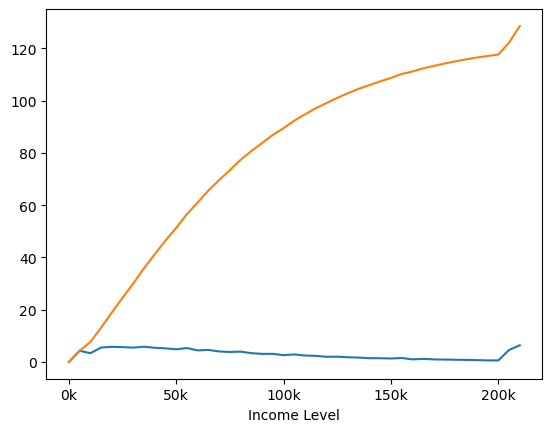

In [9]:
income_data.plot(legend=  False)

In [10]:
total_households = income_data["Households in Bracket"].sum()
total_households

128.58100000000002

In [11]:
income_data["% in Bracket"] = income_data["Households in Bracket"].div(
    total_households).mul(100)
income_data["Cumulative %"] = income_data["% in Bracket"].cumsum()
income_data

,Households in Bracket,Cumulative,% in Bracket,Cumulative %
Income Level,,,,
0k,0.000,0.000,0.000000,0.000000
5k,4.283,4.283,3.330974,3.330974
10k,3.337,7.620,2.595251,5.926225
15k,5.510,13.130,4.285237,10.211462
20k,5.772,18.902,4.488999,14.700461
25k,5.672,24.574,4.411227,19.111688
30k,5.469,30.043,4.253350,23.365038
35k,5.822,35.865,4.527885,27.892924
40k,5.404,41.269,4.202798,32.095722


Text(0.5, 1.0, 'Median Bracket: \\$60k - \\$65k\nIncome Distribution in the United States')

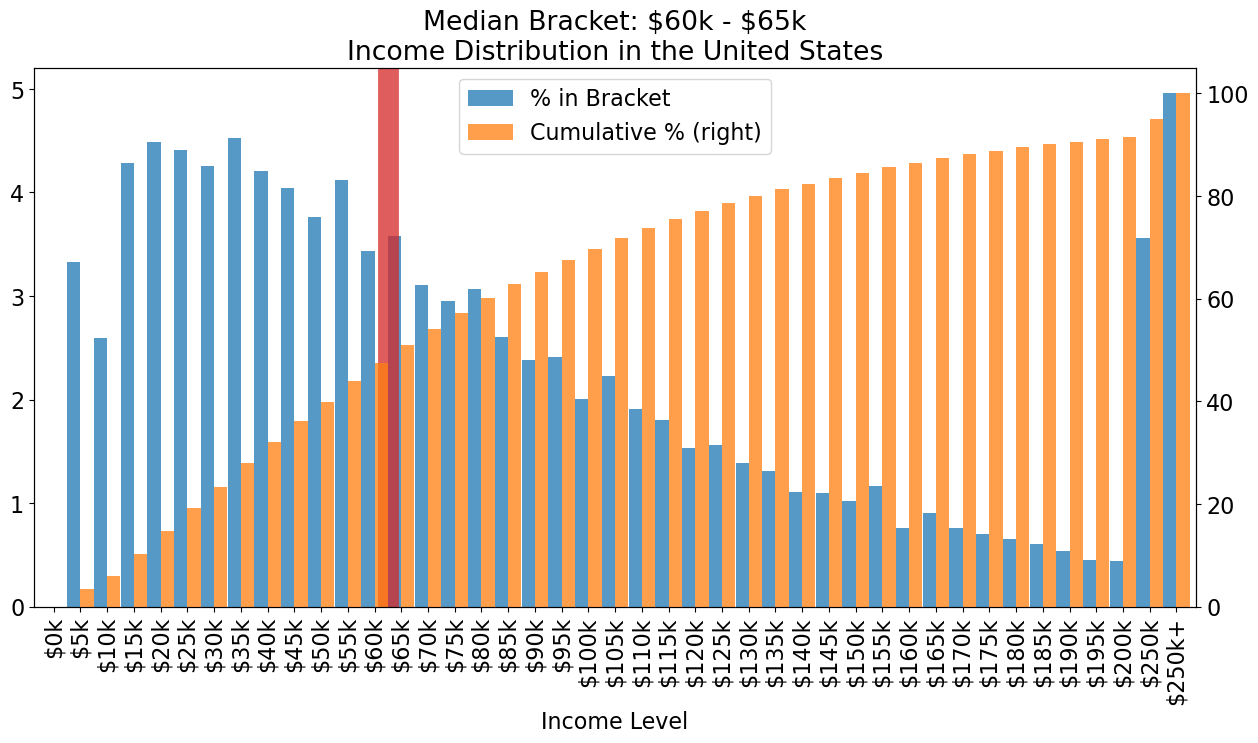

In [12]:
plt.rcParams.update({"font.size":16})
fig, ax = plt.subplots(figsize = (15,7))
# create a dataframe that exactly reflects the plot
plot_df = income_data.copy()
plot_df.plot.bar(
    y = ["% in Bracket", "Cumulative %"],
    secondary_y = "Cumulative %",
    fill = True,
    alpha = .75, 
    width = .99,
    legend = True,
    ax = ax)

# add $ in front of each label
x_ticklabels = ["$" + str(x) for x in plot_df.index]
ax.set_xticklabels(x_ticklabels)

# calculate and plot the median value
#  plot_df["Cumulative %"][plot_df["Cumulative %"] >=50]
index = list(plot_df.index).index("60k")
ax.axvline(index + .5, linewidth = 15, color = "C3", alpha = .75,
          label = "Median")
ax.set_title("Median Bracket: \$60k - \$65k\nIncome Distribution in the United States")

In [13]:
income_25k_bin = income_data.loc[::5]
income_25k_bin.loc["250k"] = income_data.iloc[-1]
# income_25k_bin["Households in Bracket"] = income_25k_bin["Cumulative"]
# income_25k_bin["Households in Bracket"] = income_25k_bin["Households in Bracket"].diff()
income_25k_bin["Households in Bracket"] = income_25k_bin["Cumulative"].diff()
income_25k_bin["% in Bracket"] = income_25k_bin["Households in Bracket"].div(
    income_25k_bin["Households in Bracket"].sum()).mul(100)
income_25k_bin

/tmp/ipykernel_379/1938834451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_25k_bin.loc["250k"] = income_data.iloc[-1]
/tmp/ipykernel_379/1938834451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_25k_bin["Households in Bracket"] = income_25k_bin["Cumulative"].diff()
/tmp/ipykernel_379/1938834451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,Households in Bracket,Cumulative,% in Bracket,Cumulative %
Income Level,,,,
0k,NaN,0.000,NaN,0.000000
25k,24.574,24.574,19.111688,19.111688
50k,26.729,51.303,20.787675,39.899363
75k,22.115,73.418,17.199275,57.098638
100k,16.046,89.464,12.479293,69.577931
125k,11.608,101.072,9.027772,78.605704
150k,7.614,108.686,5.921559,84.527263
175k,5.506,114.192,4.282126,88.809389
200k,3.442,117.634,2.676912,91.486300


/tmp/ipykernel_379/1714540224.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y1_ticklabels)


Text(0.5, 1.0, 'Income Distribution in the United States')

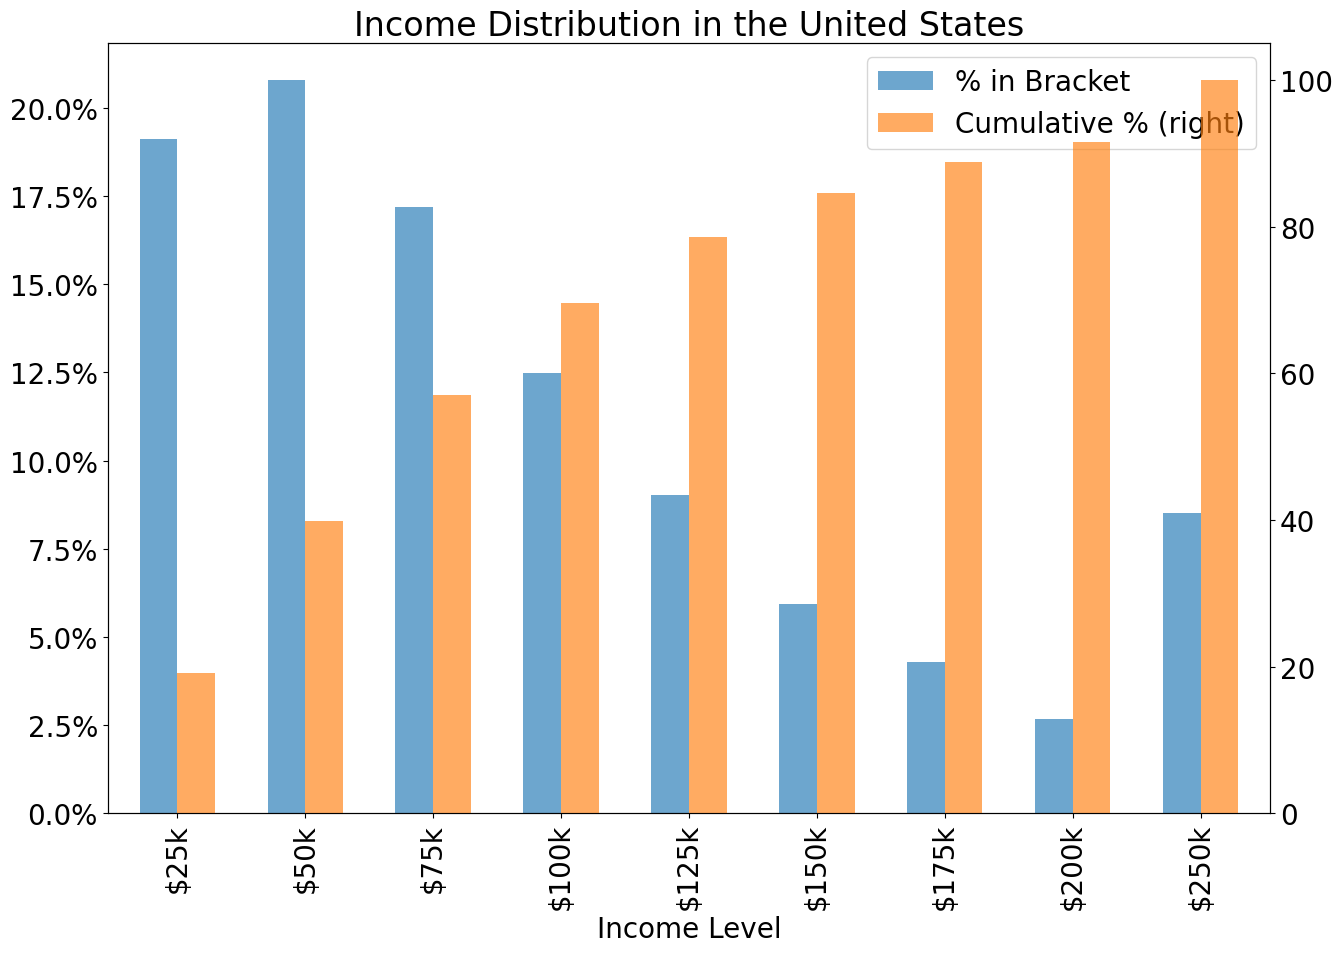

In [32]:
plt.rcParams.update({"font.size" : 20})
plot_df = income_25k_bin[["% in Bracket", "Cumulative %"]].iloc[1:]
fig, ax = plt.subplots(figsize = (15, 10))
plot_df.plot.bar(secondary_y = "Cumulative %",
                 width = .59, 
                 alpha = .65,
                 color = ["C0","C1"],
                 ax = ax,
                legend = True)
# ax.legend(loc = "upper center")
x_ticklabels = ["$" + str(x) for x in plot_df.index]
ax.set_xticklabels(x_ticklabels)

y1_ticklabels = [str(y) + "%" for y in ax.get_yticks()]
ax.set_yticklabels(y1_ticklabels)
ax.set_title("Income Distribution in the United States")

# -------------------- Class 7 ---------------------

# Project 4: Chapter 4: Functional Programming: Rudimentary Probability, Statistics, and Analytics


In [133]:
# statistical functions
import random

In [200]:
def total(lst):
    total_=0
    n= len(lst)
    for i in range(n):
        total_+=lst [i]
        
    for val in lst:
        total_=+val
        return total_
x1= [3, 6, 9, 12, 15,18,21,24,27,30]
x2=[random.randint(0,10) for i in range(10)]
print ("x1:", x1)
print ("x2:", x2)

x1: [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
x2: [6, 10, 7, 10, 6, 6, 8, 7, 2, 0]


In [202]:
total1=total(x1)
total2=total(x2)
print("Total x1:",total1)
print("Total x2:",total2)

Total x1: 3
Total x2: 6


In [204]:
# Mean- total by number of samples

def mean(lst):
    n = len(lst)
    mean_ = total(lst) / n
    return mean_

In [206]:
print("mean of X1:", mean(x1))
print("mean of X2:", mean(x2))

mean of X1: 0.3
mean of X2: 0.6


In [208]:
import numpy as np
np.mean(x1), np.mean(x2)

(16.5, 6.2)

In [210]:
# MEdian- the centre
def median(lst):
    n = len(lst)
    lst = sorted(lst)
# the % operator calculates the reminder
#case1: list is odd in length (select the middle number)
    if n%2 !=0:
    # List length is odd
        middle_index=int((n-1)/2)
        median_=lst[middle_index]
        #case 2: list is even- take the average of middle 2 values
    else:
        upper_middle_index=int(n/2)
        lower_middle_index=upper_middle_index-1
        median_=mean(lst[lower_middle_index: upper_middle_index+1])
    return median_
median1=median(x1)
median2=median(x2)
print("median of x1:", median1)
print("median of x2:", median2)

n=11
int((n-1)/2)

median of x1: 7.5
median of x2: 3.0


5

In [212]:
median(x1+[100])

18

In [214]:
median(x1+[20,100])

9.0

In [216]:
def mode(lst):
    # use to record the values how many times they appear
    max_count=0
    counter_dict ={}
    # use set if you dont want to define a value as zero multiple times
    for value in lst:
        counter_dict[value]=0
    for value in lst:
        counter_dict[value]+=1
        max_count= max(counter_dict.values())
        print(max_count)
        #mode_=[key for key in counter_dict if counter_dict[key]== max_count
        mode_=[key for key, count in counter_dict.items() if count == max_count]
    return mode_
print("mode of x1:", mode(x1))
print("mode of x2:", mode(x2))
mode(x1), mode(x2)


1
1
1
1
1
1
1
1
1
1
mode of x1: [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
1
1
1
2
2
3
3
3
3
3
mode of x2: [6]
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
3
3
3
3
3


([3, 6, 9, 12, 15, 18, 21, 24, 27, 30], [6])

In [218]:
set([1,1,1,2,2,2,3,3,3,4,4,4,])

{1, 2, 3, 4}

In [220]:
def variance(lst, sample = True):
    # popvar(list) = sum((xi - list_mean)**2) / n for all xi in list
    # save mean value of list
    list_mean = mean(lst)
    # use n to calculate average of sum squared diffs
    n = len(lst)
    DoF = n - 1
    # create value we can add squared diffs to
    sum_sq_diff = 0
    for val in lst:
        # adds each squared diff to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / DoF
    
    return variance_

variance1 = variance(x1, sample = False)
variance2 = variance(x2, sample = False)
print("variance x1:", variance1)
print("variance x2:", variance2)

variance x1: 336.68999999999994
variance x2: 40.32000000000001


Text(0, 0.6, 'mean(x2)')

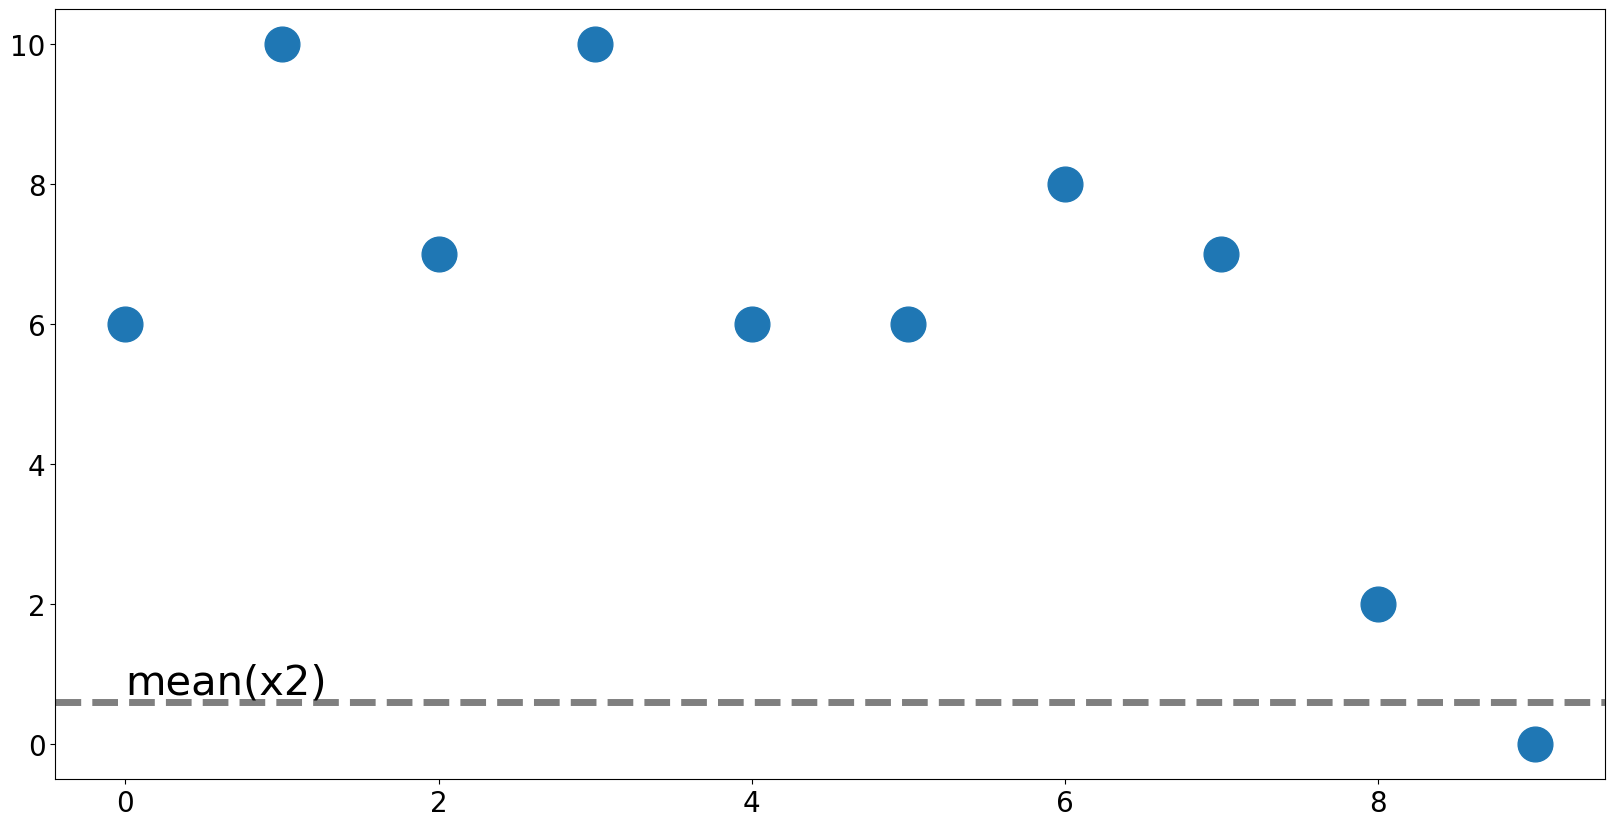

In [222]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize =(20,10))
ax.plot (x2, ls = "", marker=".", markersize=50)
ax.axhline(mean(x2), linewidth =5, alpha=.5, ls= "--", color ='k')
ax.text(0, mean(x2), "mean(x2)", va= "bottom", fontsize =30)

In [224]:
def SD(lst, sample = True):
    # Standard deviation is the square root of variance
    SD_ = variance(lst, sample) ** (1/2)
    return SD_

print("SD of x1:", x1)
print("SD of x2:", x2)

SD of x1: [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
SD of x2: [6, 10, 7, 10, 6, 6, 8, 7, 2, 0]


In [226]:
np.inf, np.inf*-1

(inf, -inf)

In [228]:
def STE(lst, sample = True):
    n = len(lst)
    se = SD(lst, sample) / n ** (1/2)
 
    return se
print("SE of x1:", STE(x1))
print("SE of x2:", STE(x2))

SE of x1: 6.1163714733492105
SE of x2: 2.1166010488516727
